# Aliasing Demonstration

This notebook illustrates the phenomenon of **aliasing**:
- A continuous signal sampled at too low a frequency can appear as a different (aliased) signal.
- According to the **Nyquist-Shannon sampling theorem**, the sampling frequency must be at least **twice the maximum frequency** of the signal to avoid aliasing.

We will:
1. Generate a clean sinusoidal signal.
2. Sample it at different rates.
3. Compare time-domain and frequency-domain representations.


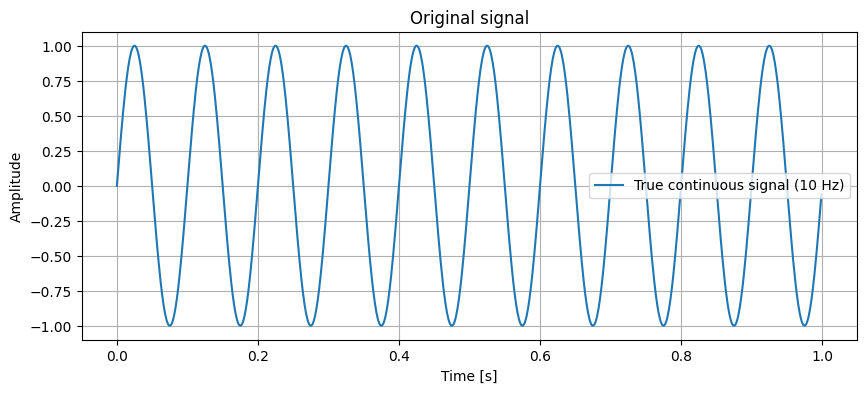

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define signal parameters
f_signal = 10  # Hz, frequency of the sine wave
t_max = 1      # seconds of simulation

# 'Continuous' reference signal (very high sampling rate)
fs_ref = 1000  # Hz
t_ref = np.arange(0, t_max, 1/fs_ref)
x_ref = np.sin(2*np.pi*f_signal*t_ref)

plt.figure(figsize=(10,4))
plt.plot(t_ref, x_ref, label='True continuous signal (10 Hz)')
plt.title('Original signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Case 1: Sampling above Nyquist (Safe)

Nyquist rate = 2 × 10 Hz = 20 Hz.

We will sample at **50 Hz** (well above Nyquist).

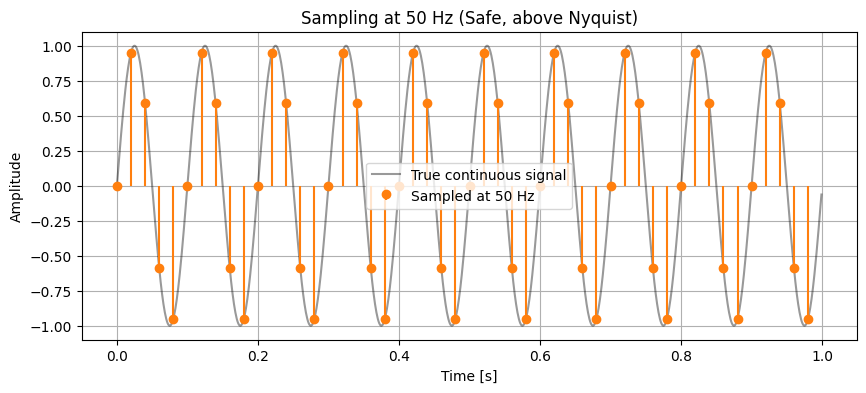

In [2]:
fs_safe = 50
t_safe = np.arange(0, t_max, 1/fs_safe)
x_safe = np.sin(2*np.pi*f_signal*t_safe)

plt.figure(figsize=(10,4))
plt.plot(t_ref, x_ref, 'k-', alpha=0.4, label='True continuous signal')
plt.stem(t_safe, x_safe, linefmt='C1-', markerfmt='C1o', basefmt=" ", label=f'Sampled at {fs_safe} Hz')
plt.title('Sampling at 50 Hz (Safe, above Nyquist)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Case 2: Sampling below Nyquist (Aliasing)

Now we sample at **12 Hz**, which is only slightly above the signal frequency but below the Nyquist rate (20 Hz).

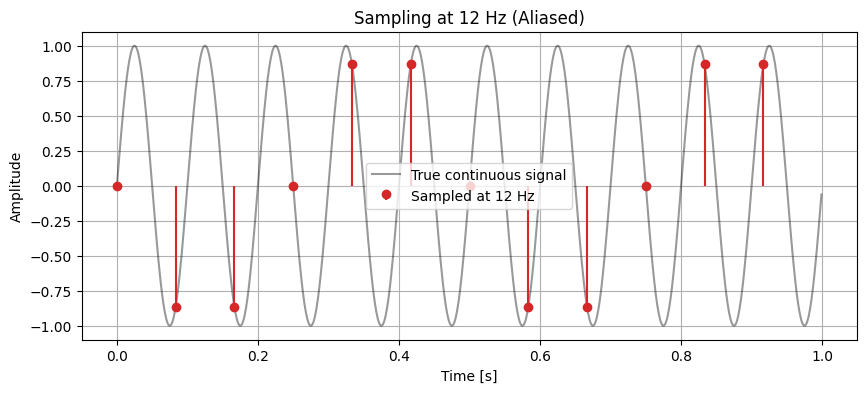

In [3]:
fs_alias = 12
t_alias = np.arange(0, t_max, 1/fs_alias)
x_alias = np.sin(2*np.pi*f_signal*t_alias)

plt.figure(figsize=(10,4))
plt.plot(t_ref, x_ref, 'k-', alpha=0.4, label='True continuous signal')
plt.stem(t_alias, x_alias, linefmt='C3-', markerfmt='C3o', basefmt=" ", label=f'Sampled at {fs_alias} Hz')
plt.title('Sampling at 12 Hz (Aliased)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Frequency-domain illustration

We now compute the FFT of the sampled signals to observe aliasing in the frequency domain.

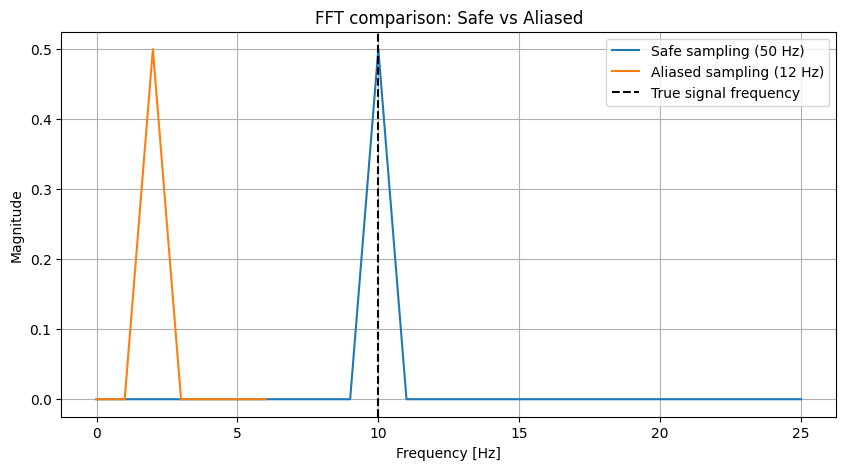

In [4]:
def plot_fft(x, fs, label):
    N = len(x)
    freqs = np.fft.rfftfreq(N, 1/fs)
    X = np.abs(np.fft.rfft(x)) / N
    plt.plot(freqs, X, label=label)

plt.figure(figsize=(10,5))
plot_fft(x_safe, fs_safe, f'Safe sampling ({fs_safe} Hz)')
plot_fft(x_alias, fs_alias, f'Aliased sampling ({fs_alias} Hz)')
plt.axvline(f_signal, color='k', linestyle='--', label='True signal frequency')
plt.title('FFT comparison: Safe vs Aliased')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion
- When sampled **above Nyquist**, the sampled points represent the true signal correctly.
- When sampled **below Nyquist**, the signal appears at a **different frequency** in the sampled data — this is *aliasing*.

This explains why **oversampling** or **anti-aliasing filters** are critical in digital signal processing.